<a href="https://colab.research.google.com/github/daveDoesData/IS7033/blob/master/IS7033_Fall_2019_Final_Project_Explainable_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!pip install shap

In [0]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost
from xgboost.sklearn import XGBClassifier
import shap
import re

np.random.seed(42)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv', index_col=0)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [0]:
df['cleaned_tweet'] = [' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",s).split()) for s in df['tweet']]

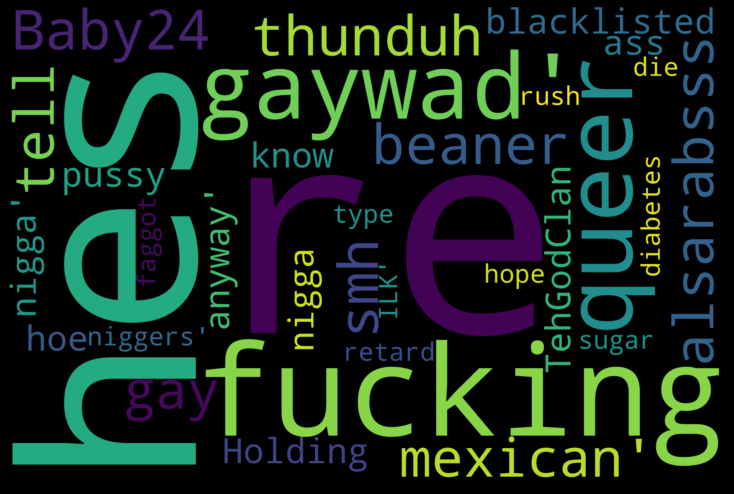

In [5]:
text = df.cleaned_tweet.values[df['class']==0]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

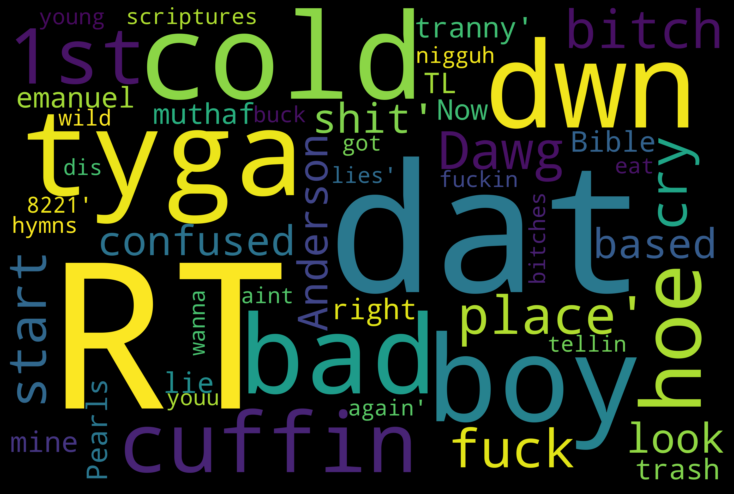

In [6]:
text = df.cleaned_tweet.values[df['class']==1]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

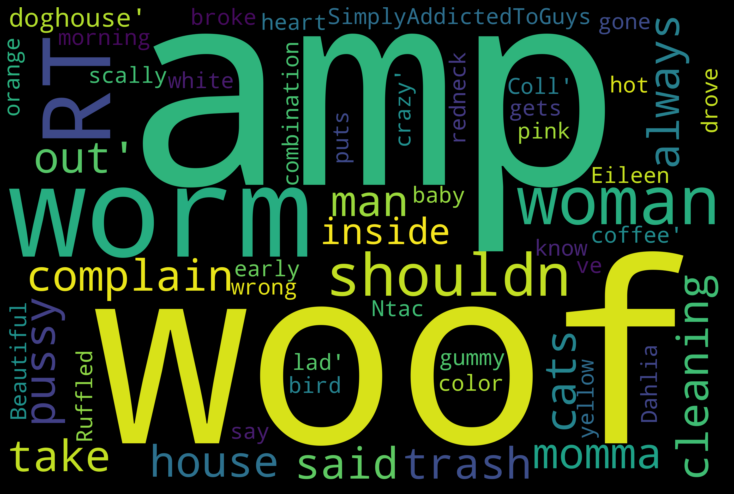

In [7]:
text = df.cleaned_tweet.values[df['class']==2]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Text Classification: XGBoost

In [0]:
X_train_corpus, X_test_corpus, y_train, y_test = train_test_split(list(df['cleaned_tweet']), df['class'].values, test_size=0.20, random_state=42)

In [0]:
vectorizer = CountVectorizer(ngram_range=(1,1))
vectorizer.fit(X_train_corpus)
X_train = vectorizer.transform(X_train_corpus)
X_test = vectorizer.transform(X_test_corpus)
column_names = vectorizer.get_feature_names()


In [0]:
X_train_df = pd.DataFrame(data=X_train.todense(),columns=column_names)
X_test_df = pd.DataFrame(data=X_test.todense(),columns=column_names)

In [11]:
model = xgboost.XGBClassifier(objective="binary:logistic", n_jobs = -1)
model.fit(X_train_df, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

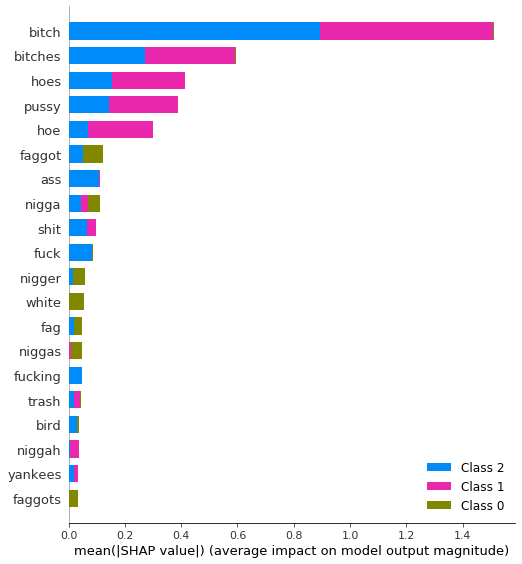

In [12]:
shap_values = shap.TreeExplainer(model).shap_values(X_test_df)
shap.summary_plot(shap_values, X_test_df)

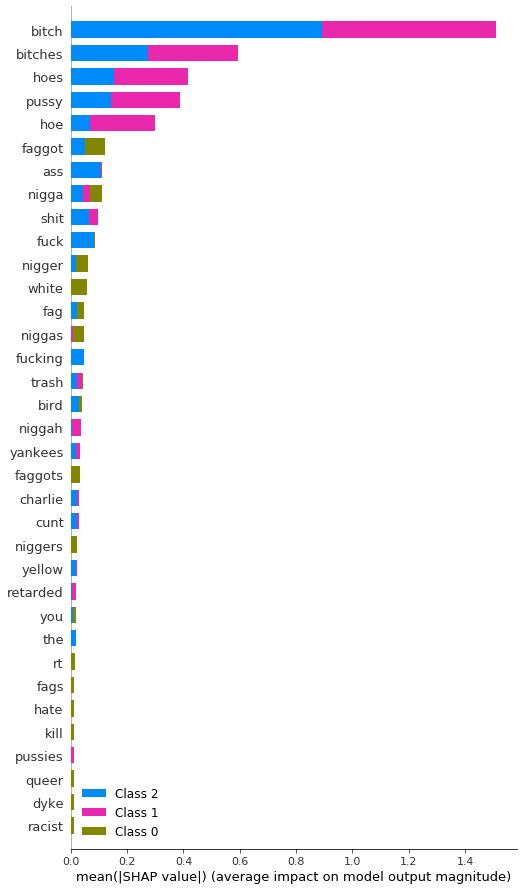

In [13]:
shap.summary_plot(shap_values, X_test_df, max_display=35)